In [1]:
import pandas as pd
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

import time
Morph = []
run_time = []

In [2]:
from konlpy.tag import Okt  
okt=Okt()  

POS_PASSWORD3 = ['Noun']

"""
# Foreign: 외국어, 한자 및 기타 기호
Noun: 명사
# Unknown: 미등록어
"""

def preprocess3(string):
    rst = ""
    try:
        vocab_pos = okt.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD3:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Okt = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Okt = df_Okt.append({'text' : preprocess3(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Okt')
run_time.append(time.time()-start)
df_Okt.head()

,text
0,나이키 배색 집업후 리스 봉봉 빈티 제품 나이키 배색 집업후 리스 가격 사이즈 길이...
1,어 커버 하프 집업후 리스 원래 양털 아우 터 어쩌다가 어 커버 집업 사 할인 거기...
2,남미 배낭여행 볼리비아 라파즈 데스 로드 킬리킬리 야경 라파즈 시간 반의 이동 후 ...
3,스윗 서브 후리 스반 집업 후드 뽀글이 양털 후드 티 털 것 상품 스윗 서브 후리 ...
4,터틀 울 골지 원피스 니트 세트 면 초 베스트 상품 보기 무배 폴라 기모 배색 프릴...


In [3]:
run_time

[2134.6220133304596]

In [4]:
df_Okt.to_csv("df_Okt.csv", header=False, index=False)

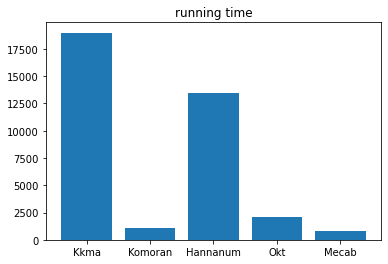

In [6]:
import matplotlib.pyplot as plt
plt.bar(['Kkma', 'Komoran', 'Hannanum', 'Okt', 'Mecab'], 
        [18989.071476221085, 1041.9504737854004, 13424.830045700073, 
        2134.6220133304596, 777.9249513149261])
plt.title("running time")
plt.show()

## 시각화

In [11]:
df_Okt = pd.read_csv("df_Okt.csv").dropna()

temp = df_Okt.values.tolist()
list_Okt = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Okt.append(vocab)
series_Okt = pd.Series(list_Okt)
Okt_counts = series_Okt.value_counts()
Okt_counts

집업      74683
판매      51200
락       50497
사이즈     42963
가격      36622
        ...  
홀스랜드        1
라쿤퍼         1
송가          1
국뽕          1
환급금         1
Length: 29880, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

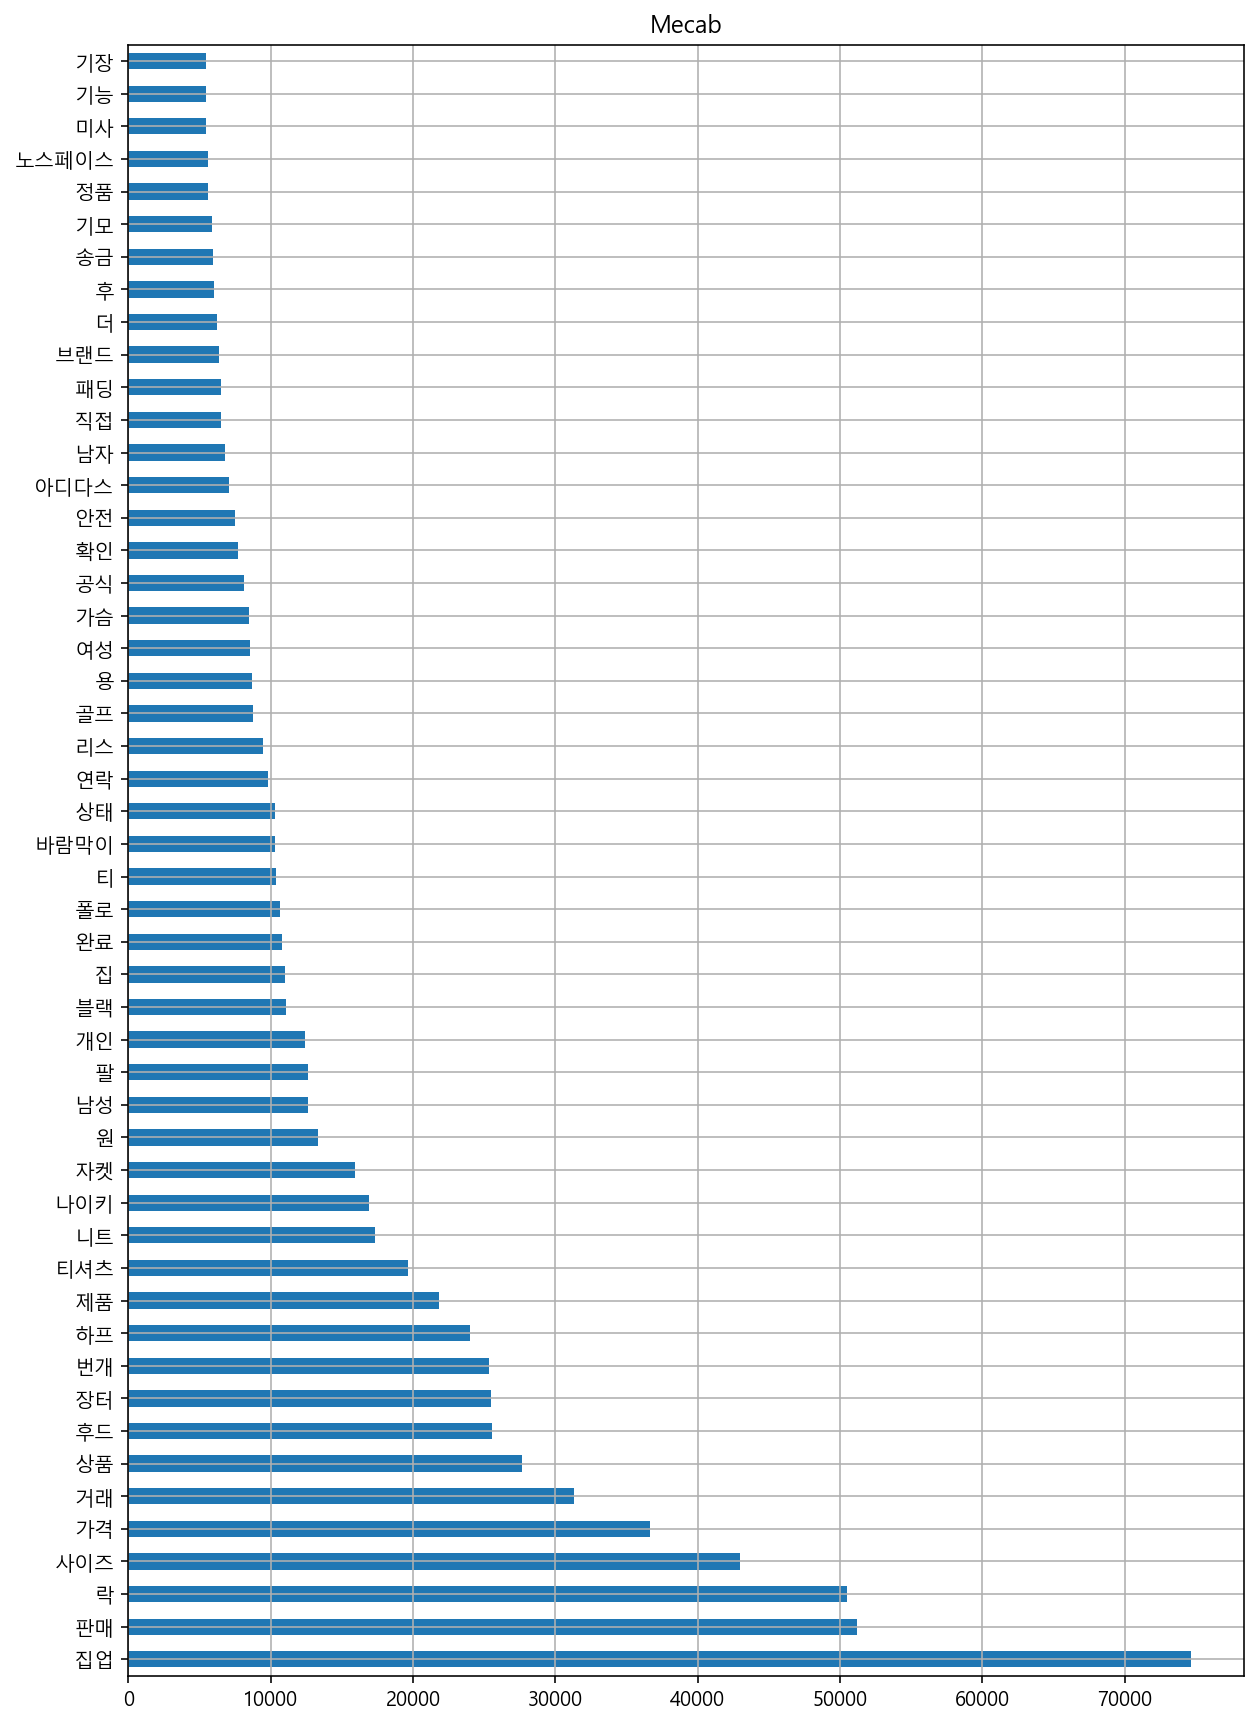

In [12]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Okt_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')